In [29]:
import numpy as np
import matplotlib.pyplot as plt
from numerik import gradient_descent

In [30]:
data = np.loadtxt('7_damped_sine_fit_nonlinear_data.txt')

start = 80000
end = 81000

# normalize x series to interval 0 to 1
t = (data[:,0] - start)/(end-start)
ym = data[:,1]

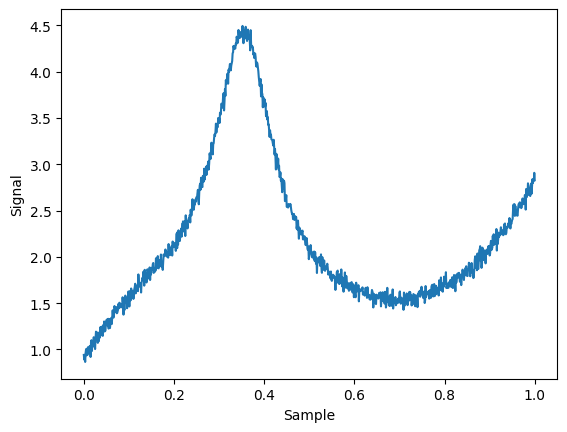

In [31]:
# visualize data
plt.plot(t, ym)
plt.ylabel("Signal")
plt.xlabel("Sample")
plt.show()

In [32]:
def model_function(x, p):
    # polynomial
    s1 = p[0] * x**0
    s2 = p[1] * x**1
    s3 = p[2] * x**2
    s4 = p[3] * x**3
    
    # lorentz shape
    x1 = (x-p[5])/(p[6]/2)
    s5 = p[4] * 1 / (1 + np.power(x1, 2))
    
    return s1+s2+s3+s4+s5

def fitness_function(x, p, y):
    return model_function(x, p) - y

def fitness_function_jacobi(x, p):
    return np.array([
        np.ones_like(x),
        x,
        x**2,
        x**3,
        1/((4*(x-p[5])**2)/(p[6]**2)+1),
        (8*p[4]*(x-p[5]))/(p[6]**2*((4*(x-p[5])**2)/p[6]**2+1)**2),
        (8*p[4]*(x-p[5])**2)/(((4*(x-p[5])**2)/p[6]**2+1)**2*p[6]**3)
    ]).T

In [33]:
# fit with gauss newton
def fit_parameters_gn(x, y, x0):
    f = lambda p: fitness_function(x, p, y)
    df = lambda p: fitness_function_jacobi(t, p)

    p = gradient_descent.gauss_newton(f, df, x0)
    return p

t2 = np.linspace(0, 1, 1000)
p0 = np.array([0., 6., -17., 12., 3., 0.3, 0.1]) * 1.1 # scaling with factor 0.8 doesn't work for example
pc = fit_parameters_gn(t, ym, x0=np.copy(p0))
print(pc)

[  0.79396372   7.07992034 -17.64317246  12.56764888   2.78434608
   0.35500754   0.1519201 ]


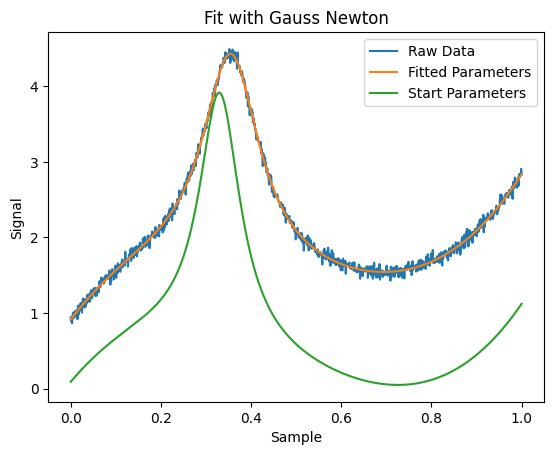

In [34]:
plt.plot(t, ym, label="Raw Data")
plt.plot(t2, model_function(t2, pc), label="Fitted Parameters")
plt.plot(t2, model_function(t2, p0), label="Start Parameters")
plt.ylabel("Signal")
plt.xlabel("Sample")
plt.legend(loc="upper right")
plt.title("Fit with Gauss Newton")
plt.show()